# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualisation skills, including aggregation, interactive visualisations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

### Instructions

Use the `san_francisco_housing.ipynb` notebook to visualise and analyse the real-estate data.

Note that this assignment requires you to create a visualisation by using hvPlot and GeoViews. Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualise and analyse the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighbourhood.

* Build an interactive neighbourhood map.

* Compose your data story.

#### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualise the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualisation.

4. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting bar chart.](Images/6-4-zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analysing?

#### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualise the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualisation.

5. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting plot.](Images/6-4-avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

#### Compare the Average Sale Prices by Neighbourhood

For this part of the assignment, use interactive visualisations and widgets to explore the average sale price per square foot by neighbourhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighbourhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualises both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighbourhood`.

4. Style and format the line plot to ensure a professionally styled visualisation.

5. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting plot.](Images/6-4-pricing-info-by-neighborhood.png)

6. Use the interactive visualisation to answer the following question:

    * For the Anza Vista neighbourhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012?

#### Build an Interactive Neighbourhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualisations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighbourhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighbourhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighbourhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighbourhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighbourhood_info_df` that groups the data by neighbourhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighbourhood_locations_df` DataFrame with the `all_neighbourhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighbourhoods_df`. The second cell cleans the data and sets the “Neighbourhood” column. Be sure to run these cells to create the `all_neighbourhoods_df` DataFrame, which you’ll need to create the geospatial visualisation.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighbourhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `frame_width` parameter to 700.

    * Set the `frame_height` parameter to 500.

    * Include a descriptive title.

    Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighbourhood has the highest gross rent, and which has the highest sale price per square foot?

#### Compose Your Data Story

Based on the visualisations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighbourhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighbourhoods exist that you would suggest for investment, and why?

In [143]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
import os

In [144]:
pwd

'/Users/omarismail/Documents/python/Challanges/Challange 6/Starter_Code-2'

## Import the data 

In [145]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighbourhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(Path('Resources/sfo_neighbourhoods_census_data.csv'))

# Review the first and last five rows of the DataFrame
sfo_data_df.head()

,year,neighbourhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualise the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualisation.

4. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting bar chart.](Images/6-4-zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analysing?

### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [146]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby('year').mean()

# Review the DataFrame
# YOUR CODE HERE
housing_units_by_year.head()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualisation.

In [147]:
# Create a visual aggregation explore the housing units by year
housing_units_by_year.hvplot.bar(x='year', y='housing_units', xlabel='YEARS', 
                                 ylabel='HOUSING UNITS', 
                                 color ='blue').opts(yformatter='%.0f', ylim=(370000,386000))

:Bars   [year]   (housing_units)

### Step 5: Answer the following question:

**Question:** What is the overall trend in housing_units over the period being analysed?

**Answer:** Uptrending 

---

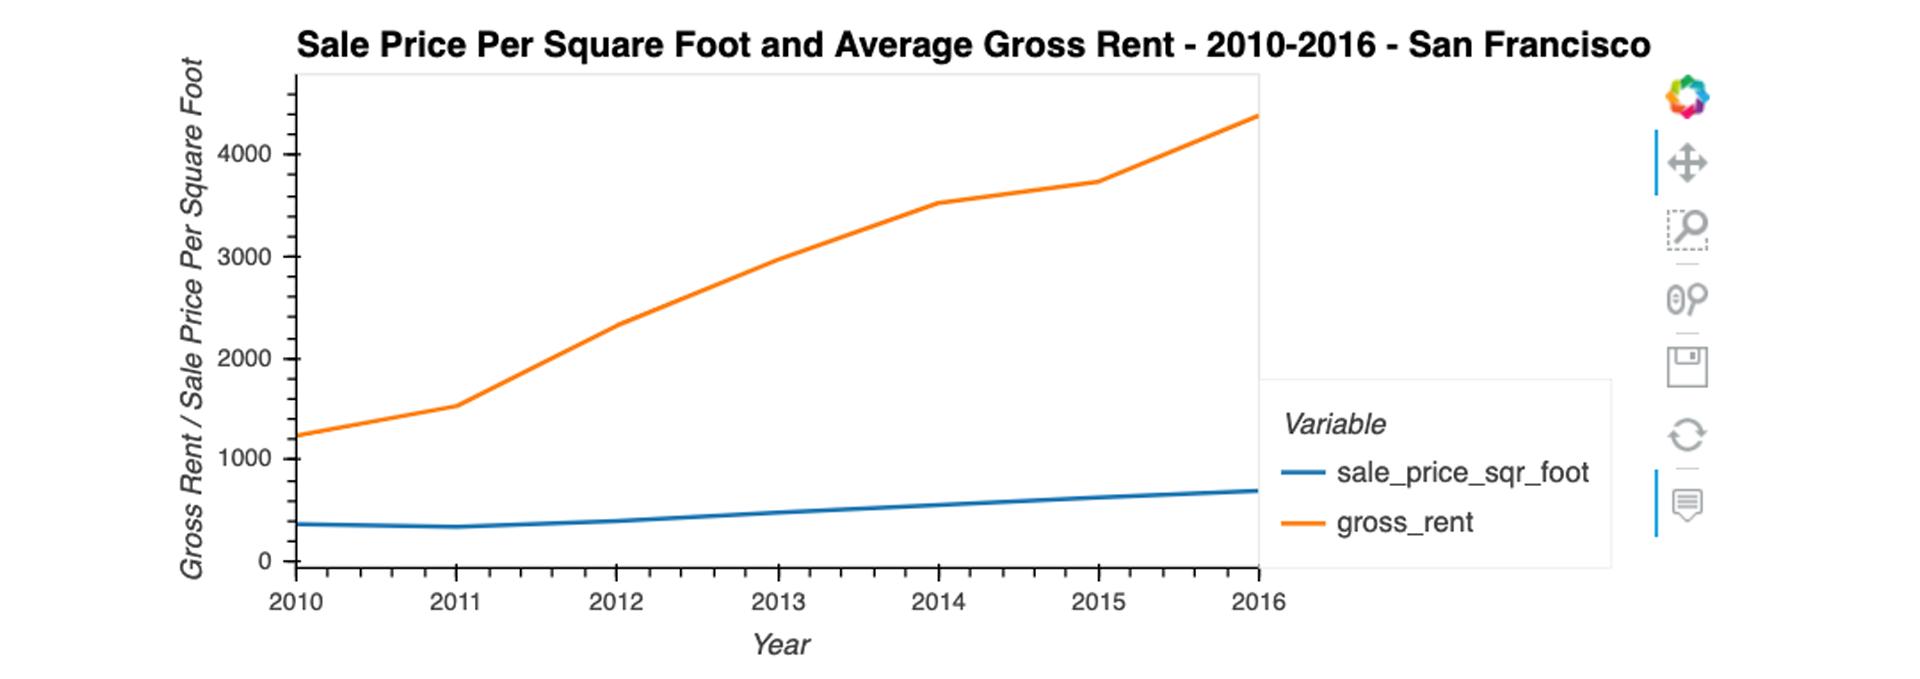## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualise the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualisation.

5. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting plot.](Images/6-4-avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

In [148]:
housing_units_by_year.head()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0


### Step 1: Group the data by year, and then average the results.

In [149]:
# Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby('year').mean()

# Review the resulting DataFrame
prices_square_foot_by_year.min()

sale_price_sqr_foot       341.903429
housing_units          372560.000000
gross_rent               1239.000000
dtype: float64

**Question:** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer:** # 1239$

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [150]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = housing_units_by_year.drop(columns=['housing_units'])

# Review the DataFrame
prices_square_foot_by_year.head()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0


### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualisation.


In [151]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
prices_square_foot_by_year.hvplot.line(x='year', xlabel='YEARS', ylabel='GROSS RENT/SQR FOOT BY YEAR', title='Sale Price per Square Foot and Average Gross Renting in San Francisco for Years 2010-2016').opts(fontsize={'title':'100%'})

:NdOverlay   [Variable]
   :Curve   [year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question:** Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer:** # 2011

**Question:** If so, did the gross rent increase or decrease during that year?

**Answer:** # Increase

---

## Compare the Average Sale Prices by Neighbourhood

For this part of the assignment, use interactive visualisations and widgets to explore the average sale price per square foot by neighbourhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighbourhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualises both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighbourhood`.

4. Style and format the line plot to ensure a professionally styled visualisation.

5. Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of the resulting plot.](Images/6-4-pricing-info-by-neighborhood.png)

6. Use the interactive visualisation to answer the following question:

    * For the Anza Vista neighbourhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012?


In [152]:
sfo_data_df.head()

,year,neighbourhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighbourhood. Aggregate the results by the `mean` of the groups.

In [153]:
# Group by year and neighbourhood and then create a new dataframe of the mean values
prices_by_year_by_neighbourhood = sfo_data_df.groupby(['year','neighbourhood']).mean()
prices_by_year_by_neighbourhood

sale_price_sqr_foot  housing_units  gross_rent
year neighbourhood                                                         
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [154]:
# Filter out the housing_units
prices_by_year_by_neighbourhood = prices_by_year_by_neighbourhood.drop(columns='housing_units')

# Review the first and last five rows of the DataFrame
display(prices_by_year_by_neighbourhood.head())
display(prices_by_year_by_neighbourhood.tail())

sale_price_sqr_foot  gross_rent
year neighbourhood                                    
2010 Alamo Square               291.182945      1239.0
     Anza Vista                 267.932583      1239.0
     Bayview                    170.098665      1239.0
     Buena Vista Park           347.394919      1239.0
     Central Richmond           319.027623      1239.0

sale_price_sqr_foot  gross_rent
year neighbourhood                                          
2016 Telegraph Hill                   903.049771      4390.0
     Twin Peaks                       970.085470      4390.0
     Van Ness/ Civic Center           552.602567      4390.0
     Visitacion Valley                328.319007      4390.0
     Westwood Park                    631.195426      4390.0

### Step 3: Create an interactive line plot with hvPlot that visualises both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighbourhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualisation.

In [155]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighbourhood
prices_by_year_by_neighbourhood.hvplot.line(x='year', xlabel="YEAR", ylabel='GROSS RENT/SALE PRICE SQR FOOT', groupby='neighbourhood')

:DynamicMap   [neighbourhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

### Step 6: Use the interactive visualisation to answer the following question:

**Question:** For the Anza Vista neighbourhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer:** # Less

---

## Build an Interactive Neighbourhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualisations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighbourhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighbourhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighbourhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighbourhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighbourhood_info_df` that groups the data by neighbourhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighbourhood_locations_df` DataFrame with the `all_neighbourhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighbourhoods_df`. The second cell cleans the data and sets the “Neighbourhood” column. Be sure to run these cells to create the `all_neighbourhoods_df` DataFrame, which you’ll need to create the geospatial visualisation.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighbourhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `frame_width` parameter to 700.

    * Set the `frame_height` parameter to 500.

    * Include a descriptive title.

    Note that your resulting plot should appear similar to the following image:

    ![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighbourhood has the highest gross rent, and which has the highest sale price per square foot?

### Step 1: Read the `neighbourhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighbourhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighbourhood”.

In [156]:
# Load neighbourhoods coordinates data
neighbourhood_locations_df = pd.read_csv(Path('Resources/neighbourhoods_coordinates.csv'), 
                                         index_col='Neighbourhood')

# Review the DataFrame
neighbourhood_locations_df.head()

,Lat,Lon
Neighbourhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighbourhood_info_df` that groups the data by neighbourhood. Aggregate the results by the `mean` of the group.

In [157]:
sfo_data_df.head()

,year,neighbourhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [158]:
# Calculate the mean values for each neighbourhood
all_neighbourhood_info_df = sfo_data_df.groupby('neighbourhood').mean()

# Review the resulting DataFrame
all_neighbourhood_info_df

,year,sale_price_sqr_foot,housing_units,gross_rent
neighbourhood,,,,
Alamo Square,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,2013.333333,373.382198,379050.00,3031.833333
Bayview,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...
West Portal,2012.250000,498.488485,376940.75,2515.500000
Western Addition,2012.500000,307.562201,377427.50,2555.166667
Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000


### Step 3: Review the two code cells that concatenate the `neighbourhood_locations_df` DataFrame with the `all_neighbourhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighbourhoods_df`. 

The second cell cleans the data and sets the “Neighbourhood” column. 

Be sure to run these cells to create the `all_neighbourhoods_df` DataFrame, which you’ll need to create the geospatial visualisation.

In [159]:
# Using the Pandas `concat` function, join the 
# neighbourhood_locations_df and the all_neighbourhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighbourhoods_df = pd.concat(
    [neighbourhood_locations_df, all_neighbourhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighbourhoods_df.head())
display(all_neighbourhoods_df.tail())


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN,NaN


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Yerba Buena,37.79298,-122.39636,2012.5,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,2013.5,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,2013.0,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,2012.5,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,2013.0,473.900773,378401.0,2817.285714


In [160]:
# Call the dropna function to remove any neighbourhoods that do not have data
all_neighbourhoods_df = all_neighbourhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighbourhood" for use in the Visualisation
all_neighbourhoods_df = all_neighbourhoods_df.rename(columns={"index": "Neighbourhood"})

# Review the resulting DataFrame
display(all_neighbourhoods_df.head())
display(all_neighbourhoods_df.tail())

,Neighbourhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.5,2698.833333


,Neighbourhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
68,West Portal,37.74026,-122.463880,2012.25,498.488485,376940.75,2515.500000
69,Western Addition,37.79298,-122.435790,2012.50,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.73470,-122.456854,2012.00,533.703935,376454.00,2250.500000
71,Westwood Park,37.73415,-122.457000,2015.00,687.087575,382295.00,3959.000000
72,Yerba Buena,37.79298,-122.396360,2012.50,576.709848,377427.50,2555.166667


### Step 4: Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighbourhoods_df` DataFrame. Be sure to do the following:

* Set the `geo` parameter to True.
* Set the `size` parameter to “sale_price_sqr_foot”.
* Set the `color` parameter to “gross_rent”.
* Set the `frame_width` parameter to 700.
* Set the `frame_height` parameter to 500.
* Include a descriptive title.

In [172]:
import geoviews as gv

In [200]:
# Create a plot to analyse neighbourhood info
all_neighbourhoods_df.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    size='sale_price_sqr_foot',
    color='gross_rent',
    frame_width=700,
    frame_height=500,
    tiles='OSM',
    title="Gross rent and Sale price per sqr foot price for housing units in San Francisco fro year 2010-2016"
) * all_neighbourhoods_df.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    c='Neighbourhood'
)

:Overlay
   .Tiles.I   :Tiles   [x,y]
   .Points.I  :Points   [Lon,Lat]   (gross_rent,sale_price_sqr_foot)
   .Points.II :Points   [Lon,Lat]   (Neighbourhood)

### Step 5: Use the interactive map to answer the following question:

**Question:** Which neighbourhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer:** # Westwood park

## Compose Your Data Story

Based on the visualisations that you created, answer the following questions:

**Question:**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighbourhoods across San Francisco?

**Answer:** Rent is going up compared to sale price almost stationary wiht some increase. This applied to most neighbourhood, no all. 

**Question:** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighbourhoods exist that you would suggest for investment, and why?

**Answer:** # YOUR ANSWER HERE